**Maya Kalenak**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

import time

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 4: Eigenletters — PCA on images of hand-drawn letters

Here, you will implement an algorithm that uses eigenvectors to reconstruct images based on how the deviate from the mean (i.e. average) image in a library of images. The original algorithm was applied to human faces (here is a [link](https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf) to original paper), but we are going to apply it to hand-written letters from the EMNIST data set ([link](https://www.nist.gov/itl/products-and-services/emnist-dataset))

### 4a. Load in the dataset of images of a letter

Run the code below to load in 4,800 images of a single letter (including lower and upper case versions). You can download the file for each letter separately. Change the letter to whichever letter you want (and file you downloaded).

In [2]:
letter = 'y'
letter_imgs = np.load(f'data/emnist_letter_{letter}.npy')

print(f'There are {letter_imgs.shape[0]} letters. There should be 4800.')
print(f'Shape of images is are {letter_imgs.shape} letters. It should be (4800, 28, 28).')

There are 4800 letters. There should be 4800.
Shape of images is are (4800, 28, 28) letters. It should be (4800, 28, 28).


### 4b. Look at the letter data

In the cell below, fill in the function to create a 12x10 subplots grid of plots (*12 rows, 10 columns*). For showing the image, use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):

Run the function to create the plot of the letters below, with the title "Original".

**Note:**
- When you call `imshow`, add these optional parameters to create black-on-white images: `cmap='gray'`, `vmin=0`, and `vmax=255`
- Turn off the x and y ticks (they just add clutter).


In [3]:
def plot_letter( letter_imgs, title ):
    '''Creates a 12x10 grid of grayscale letter images.
    
    Parameters:
    -----------
    letter_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    title: string
        Title to display above all the subplots
    
    '''
    fig, axes = plt.subplots(12,10, figsize=(10,10))

    # for i in range(12):
    #     for j in range(10):
    #         axes[i,j].imshow(letter_imgs,cmap='gray',vmin=0,vmax=225)
    #         axes[i,j].set_yticks([])
    #         axes[i,j].set_xticks([])
    # plt.suptitle(title)
    # plt.tight_layout()
    # plt.show()

    for i , ax in enumerate(axes.flat):
        ax.imshow(letter_imgs[i],cmap='gray',vmin=0,vmax=225)
        ax.axis("off")

    fig.suptitle(title)
    
    plt.tight_layout()
    plt.show()

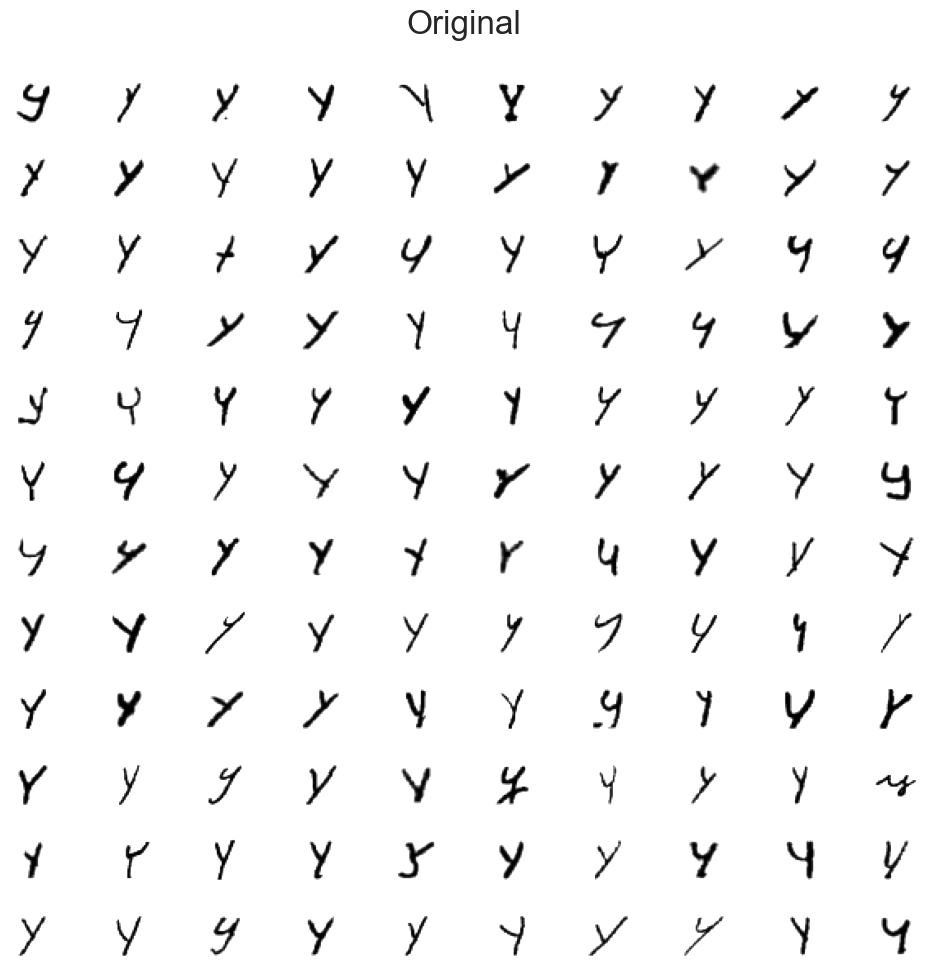

In [4]:
# Your code that calls plot_letter
plot_letter(letter_imgs,"Original")

### 4c. Visualize the "mean letter"

Take the mean of the images and show it below.

**Note:** Use the same `cmap`, `vmin`, and `vmax` parameters as above and turn off x and y tick marks.

(28, 28)


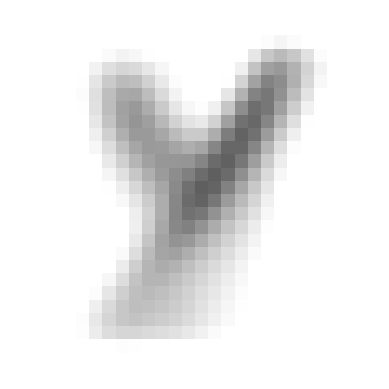

In [5]:
# Your code here
mean_image = np.mean(letter_imgs,axis=0)
print(mean_image.shape)
# # print(mean_image_reshaped.shape)
# sum = 0
# for i in range(10):
#     for j in range(12):
#         sum += letter_imgs[i,j]
#         mean = sum/28
# mean_image_reshaped = mean.reshape(1,mean.shape[0])
plt.xticks([])
plt.yticks([])
plt.imshow(mean_image,cmap = 'gray',vmin = 0,vmax = 225);


### 4d. Preprocess letter data

In the letter dataset, each hand-written letter is a sample and each pixel is a variable. Currently, the latter data has shape = `(4800, 28, 28)` or $N = 4800$ samples and $M = 28*28 = 784$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(4800, 28*28)` = `(4800, 784)`. This will make a standard matrix and should work with your PCA code.


In the following cell, reshape the letter data **without hardcoding** ANY of (4800, 28*28)!

In [6]:
# Your reshape code here
print(letter_imgs.shape)
letter_imgs = letter_imgs.reshape((letter_imgs.shape[0], letter_imgs.shape[1]*letter_imgs.shape[2]))
print(letter_imgs.shape)

(4800, 28, 28)
(4800, 784)


### 4e. Perform PCA on preprocessed letter data

Create pandas DataFrame object that holds the letter data then run PCA on the letter dataset. The header names of consecutive integers `0, 1, ..., 783` are fine. For the `vars` parameter in the `fit` method, pass in a Python list of ints (`0, 1, ..., 783`).

**Notes:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.
- When running the PCA, do not normalize the data. We do not want to treat each pixel as a separate feature.

In [7]:
# Your code here
df = pd.DataFrame(letter_imgs)
analysis = pca.PCA(df)
print(time.thread_time_ns())
# analysis.covariance_matrix(letter_imgs)
# prop_var = analysis.compute_prop_var(e_val)
# analysis.compute_cum_var(prop_var)
var = np.arange(0,784,step=1)
analysis.fit(list(var))

55510872


### 4f. Make letter PCA elbow plot

Make an elbow plot of the PCA results. Show **show only a reasonable number of PCs** to focus on the curve before it plateaus.

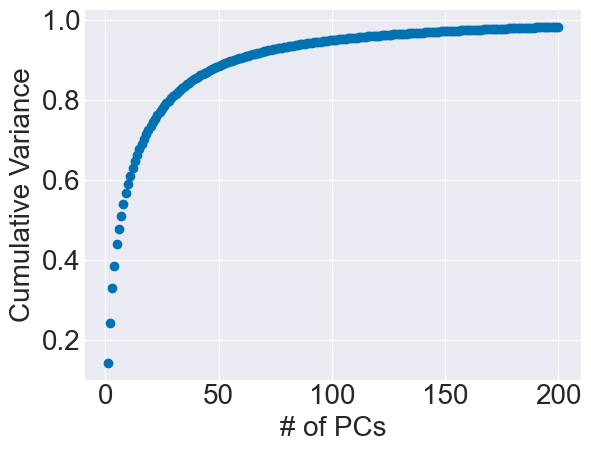

In [8]:
# elbow plot code here
analysis.elbow_plot(200)

### 4g. Reconstruct letters using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 20%
- 50%
- 95%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(4800, 28, 28)`.
3. Use `plot_letter` to plot the reconstructed 1st 120 letters with each of the variance numbers above.

**There should be 3 12x10 plots below**

In [9]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image

    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    image_dim = int(np.sqrt(reconstucted_imgs.shape[1]))

    reshaped_img = reconstucted_imgs.reshape(int(reconstucted_imgs.shape[0]),image_dim,image_dim)

    return reshaped_img

#### Reconstructed letters with increasing accuracy

(4800, 784)


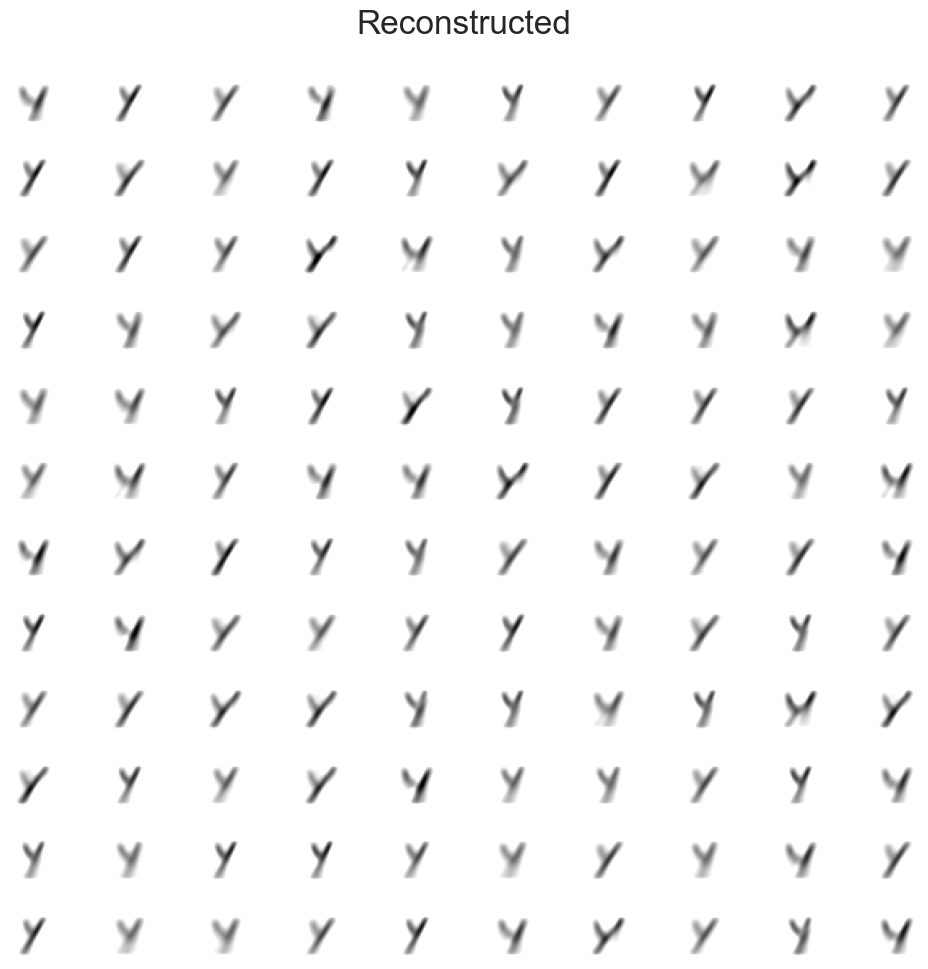

In [10]:
# Your code here
project_matrix = analysis.pca_then_project_back(2)
matrix1 = np.real(project_matrix)
print(matrix1.shape)
img3D = make_imgs(matrix1)
plot_letter(img3D, "Reconstructed")

(4800, 784)


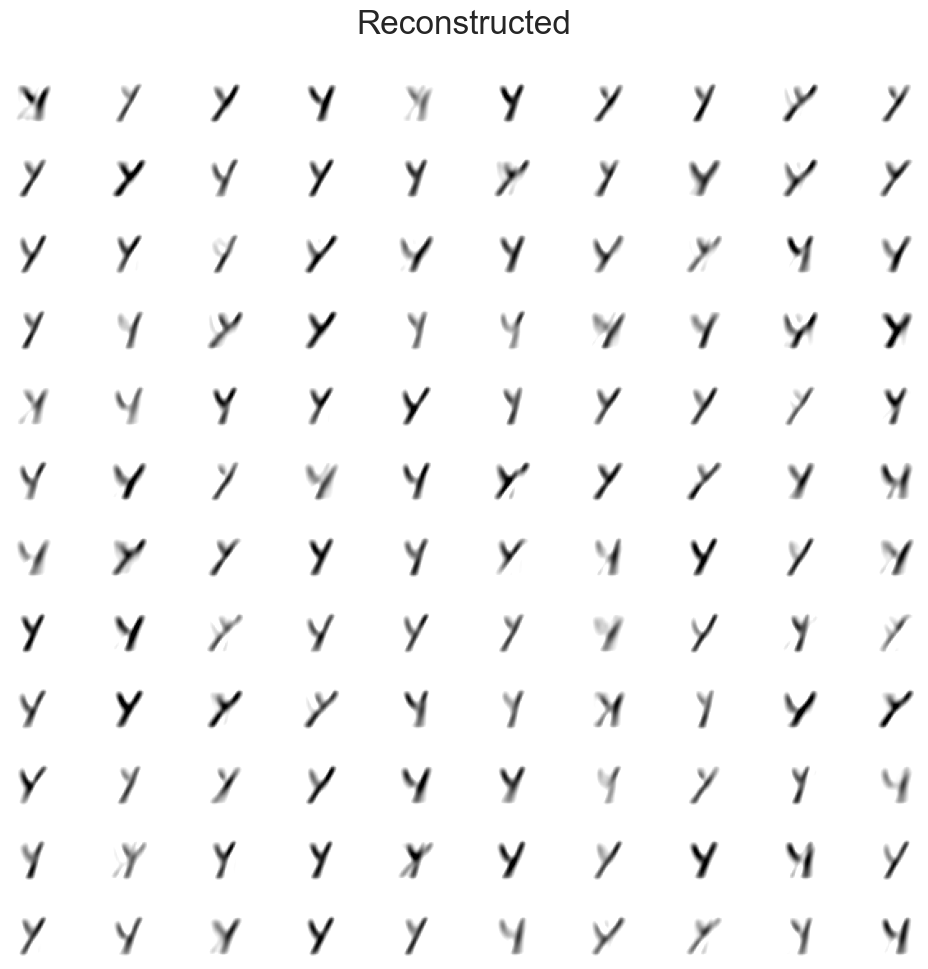

In [11]:
project_matrix1 = analysis.pca_then_project_back(7)
matrix2 = np.real(project_matrix1)
print(matrix2.shape)
img3D = make_imgs(matrix2)
plot_letter(img3D, "Reconstructed")

(4800, 784)


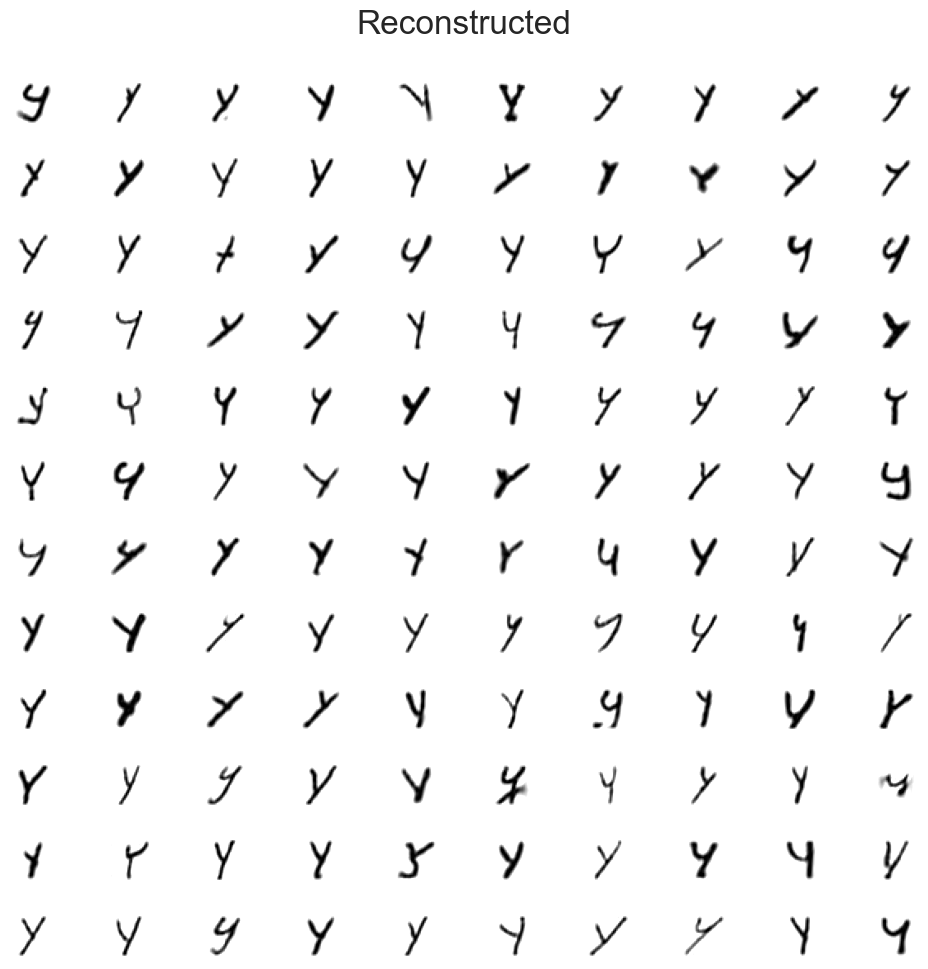

In [12]:
project_matrix2 = analysis.pca_then_project_back(100)
matrix3 = np.real(project_matrix2)
print(matrix3.shape)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed")

### 4h. Questions

**Question 12:** Pick one of the letter samples to focus on. Choose one that undergoes a visually interesting transformation as more eigenvectors are used in the reconstruction. Describe what happens visually to the same sample over the course of the reconstructions. Set up 5 plots in a row. The first should be the mean letter (because that is what we start from when we do the reconstruction). The next three should be just that sample with each level of reconstruction (from worst to best). The final plot should be the original data for that sample. Your description should have at least 5 sentences in it.

In [13]:
plt.subplots(1,5)

plt.subplot(1,5,1)
plt.imshow(mean_image,cmap = 'gray',vmin = 0,vmax = 225)
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,2)
reshaped_matrix1 = matrix1[0].reshape(int(np.sqrt(matrix1[0].shape[0])),int(np.sqrt(matrix1[0].shape[0])))
plt.imshow(reshaped_matrix1)
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,3)
reshaped_matrix2 = matrix2[0].reshape(int(np.sqrt(matrix2[0].shape[0])),int(np.sqrt(matrix2[0].shape[0])))
plt.imshow(reshaped_matrix2)
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,4)
reshaped_matrix3 = matrix3[0].reshape(int(np.sqrt(matrix3[0].shape[0])),int(np.sqrt(matrix3[0].shape[0])))
plt.imshow(reshaped_matrix3)
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,5)
reshaped_img = letter_imgs[0].reshape(int(np.sqrt(letter_imgs[0].shape[0])),int(np.sqrt(letter_imgs[0].shape[0])))
plt.imshow(reshaped_img)
plt.xticks([])
plt.yticks([]);


**Answer 12:** The original data shows handwritten letter Y's in verious styles. The mean image takes the average "shape" of each written letter to get an idea of that the letter "looks" like. The reconstructed image reconstructs the original image with the mean image with an increasing number of eigen vectors to add accuracy. The first image is the mean image, the second is the reconstructed image with 2 eigen vectors, the third image is reconstructed with 7 eigen vectors, the fourth image is reconstructed with 75 eigen vectors to account for 95% of the data, then the last image is the original image all of the first image in the 10x12 image set. It is visible using this image that the curve in the hook of the y shows up better with more eigen vectors. The change in making the image contain a hook is visible in the third image where the y shape is switching from partially not having a hook and bieng a straight line to partially containing a hook. This is because the mean image didn't have a hook, so when the image is reconstructed using the mean image with less eigen vectors, there is no hook, but when more eigen vectors are added, the letter becomes more clear and looks more like the original data where it contains a hook in this image. 

**Question 13:** Would it be effective to use the eigenvectors from one letter's data set to project and then project back (i.e. reduce and reconstruct) data from a different letter? 

Either write several sentences with your reasoning or demonstrate it by writing the code to do it. If you do write the code, describe your output and write about whether or not you think your example is representative (e.g. how are your results dependent upon the two letters that you chose?)

**Answer 13:** Unless the two letters look very similar and the handwriting samples are written in similar fashions as well, the eigen vectors cannot be translated from one dataset to another to accurately predict one eigenletter from another. For example, since the letters n and m, letters T and I, and letters V and U, have similar shapes, their eigen vecotrs should be similar, so they can be used to predict one off of the other to a certain level of accuracy, but not perfectly. However letters that do not look similar, like A and W or P and M or letters that are written in severely different styles whether or not they are the same shapes cannot be used to predict one off of another since their eigen vecotrs will look different.

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

In [14]:
data = np.genfromtxt("data/fish_pca.csv",delimiter=",", skip_header=2)
dataFrame = pd.DataFrame(data)
numData = dataFrame.loc[:,1:]
pca_analysis = pca.PCA(numData)
headers = np.arange(1,6,step=1)
pca_analysis.fit(headers, True)
print(numData)

         1     2     3     4        5       6
0    242.0  23.2  25.4  30.0  11.5200  4.0200
1    290.0  24.0  26.3  31.2  12.4800  4.3056
2    340.0  23.9  26.5  31.1  12.3778  4.6961
3    363.0  26.3  29.0  33.5  12.7300  4.4555
4    430.0  26.5  29.0  34.0  12.4440  5.1340
..     ...   ...   ...   ...      ...     ...
154   12.2  11.5  12.2  13.4   2.0904  1.3936
155   13.4  11.7  12.4  13.5   2.4300  1.2690
156   12.2  12.1  13.0  13.8   2.2770  1.2558
157   19.7  13.2  14.3  15.2   2.8728  2.0672
158   19.9  13.8  15.0  16.2   2.9322  1.8792

[159 rows x 6 columns]


In [15]:

plt.subplots(5,5,figsize = (30,20))

plt.subplot(5,5,1)
Achat4 = pca_analysis.pca_project([4,0])
plt.scatter(Achat4[:,0],Achat4[:,1])
plt.ylabel("PC5")

plt.subplot(5,5,2)
Achat2 = pca_analysis.pca_project([4,1]) 
plt.scatter(Achat2[:,0],Achat2[:,1])

plt.subplot(5,5,3)
Achat1 = pca_analysis.pca_project([4,2]) 
plt.scatter(Achat1[:,0],Achat1[:,1])
plt.subplot(5,5,4)
Achat3 = pca_analysis.pca_project([4,3])
plt.scatter(Achat3[:,0],Achat3[:,1])

plt.subplot(5,5,5)
Achat3 = pca_analysis.pca_project([4,4])
plt.scatter(Achat3[:,0],Achat3[:,1])


plt.subplot(5,5,6)
Achat4 = pca_analysis.pca_project([3,0])
plt.scatter(Achat4[:,0],Achat4[:,1])
plt.ylabel("PC4")

plt.subplot(5,5,7)
Achat2 = pca_analysis.pca_project([3,1]) 
plt.scatter(Achat2[:,0],Achat2[:,1])

plt.subplot(5,5,8)
Achat1 = pca_analysis.pca_project([3,2]) 
plt.scatter(Achat1[:,0],Achat1[:,1])

plt.subplot(5,5,9)
Achat3 = pca_analysis.pca_project([3,3])
plt.scatter(Achat3[:,0],Achat3[:,1])

plt.subplot(5,5,10)
Achat3 = pca_analysis.pca_project([3,4])
plt.scatter(Achat3[:,0],Achat3[:,1])


plt.subplot(5,5,11)
Achat4 = pca_analysis.pca_project([2,0])
plt.scatter(Achat4[:,0],Achat4[:,1])
plt.ylabel("PC3")

plt.subplot(5,5,12)
Achat2 = pca_analysis.pca_project([2,1]) 
plt.scatter(Achat2[:,0],Achat2[:,1])

plt.subplot(5,5,13)
Achat1 = pca_analysis.pca_project([2,2]) 
plt.scatter(Achat1[:,0],Achat1[:,1])

plt.subplot(5,5,14)
Achat3 = pca_analysis.pca_project([2,3])
plt.scatter(Achat3[:,0],Achat3[:,1])

plt.subplot(5,5,15)
Achat3 = pca_analysis.pca_project([2,4])
plt.scatter(Achat3[:,0],Achat3[:,1])


plt.subplot(5,5,16)
Achat4 = pca_analysis.pca_project([1,0])
plt.scatter(Achat4[:,0],Achat4[:,1])
plt.ylabel("PC2")

plt.subplot(5,5,17)
Achat2 = pca_analysis.pca_project([1,1]) 
plt.scatter(Achat2[:,0],Achat2[:,1])

plt.subplot(5,5,18)
Achat1 = pca_analysis.pca_project([1,2]) 
plt.scatter(Achat1[:,0],Achat1[:,1])

plt.subplot(5,5,19)
Achat3 = pca_analysis.pca_project([1,3])
plt.scatter(Achat3[:,0],Achat3[:,1])

plt.subplot(5,5,20)
Achat3 = pca_analysis.pca_project([1,4])
plt.scatter(Achat3[:,0],Achat3[:,1])


plt.subplot(5,5,21)
Achat4 = pca_analysis.pca_project([0,0])
plt.scatter(Achat4[:,0],Achat4[:,1])
plt.ylabel("PC1")
plt.xlabel("PC1")

plt.subplot(5,5,22)
Achat2 = pca_analysis.pca_project([0,1]) 
plt.scatter(Achat2[:,0],Achat2[:,1])
plt.xlabel("PC2")

plt.subplot(5,5,23)
Achat1 = pca_analysis.pca_project([0,2]) 
plt.scatter(Achat1[:,0],Achat1[:,1])
plt.xlabel("PC3")

plt.subplot(5,5,24)
Achat3 = pca_analysis.pca_project([0,3])
plt.scatter(Achat3[:,0],Achat3[:,1])
plt.xlabel("PC4")

plt.subplot(5,5,25)
Achat3 = pca_analysis.pca_project([0,4])
plt.scatter(Achat3[:,0],Achat3[:,1])
plt.xlabel("PC5")

plt.suptitle("Projection")
plt.tight_layout()

In [16]:
plt.subplots(5,1,figsize = (10,40))

plt.subplot(5,1,1)
reconstructed_projection = pca_analysis.pca_then_project_back(1)
plt.scatter(reconstructed_projection[:,0], reconstructed_projection[:,1]);
plt.title("Reconstructed with top 1 PC")

plt.subplot(5,1,2)
reconstructed_projection = pca_analysis.pca_then_project_back(2)
plt.scatter(reconstructed_projection[:,0], reconstructed_projection[:,1]);
plt.title("Reconstructed with top 2 PCs")

plt.subplot(5,1,3)
reconstructed_projection = pca_analysis.pca_then_project_back(3)
plt.scatter(reconstructed_projection[:,0], reconstructed_projection[:,1]);
plt.title("Reconstructed with top 3 PCs")

plt.subplot(5,1,4)
reconstructed_projection = pca_analysis.pca_then_project_back(4)
plt.scatter(reconstructed_projection[:,0], reconstructed_projection[:,1]);
plt.title("Reconstructed with top 4 PCs")

plt.subplot(5,1,5)
reconstructed_projection = pca_analysis.pca_then_project_back(5)
plt.scatter(reconstructed_projection[:,0], reconstructed_projection[:,1]);
plt.title("Reconstructed with top 5 PCs")

plt.suptitle("Reconstruction")
# plt.tight_layout();

Text(0.5, 0.98, 'Reconstruction')

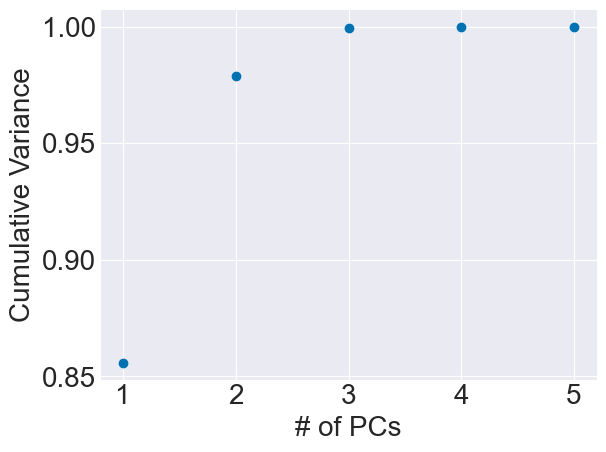

In [17]:
pca_analysis.elbow_plot()

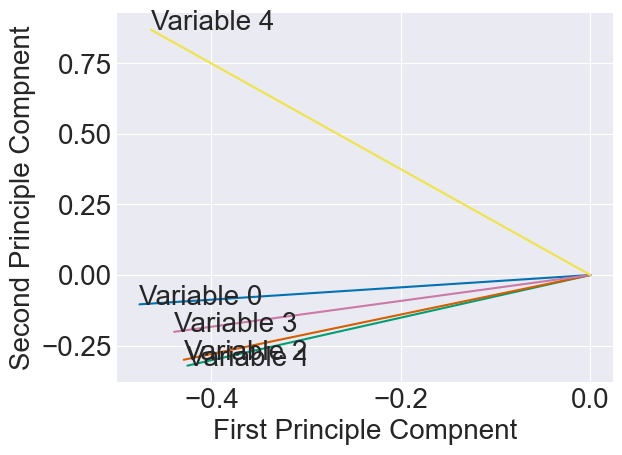

In [18]:
pca_analysis.loading_plot()

I used the fish dataset from Kaggle that I found for project 3 which constains data from heights, weigths, widths, and lengths of fish. I previously noticed that most of the regression curves that I plotted were somewhat exponential in the scatter plots, but 1 scatterplot of data had three forks in the data, so I was wondering if the PCA would notice this and account for this. In the projection of the data I chose to compare each of the variables to eachother to get the best sense of what the major contributions and correlations in the PCA are. I found that this pattern is visible in the projection of the first and third principle component and the first and second principle component. In the reconstructed data, it is also visible in when the data is reconstructed with the top 2 principle commponents and more. Additionally, I computed the loading plot which shows that the first 4 variables contribute negatively to the first and second principle components. The fifth variable contributes positively to the second principle component and negatively to the first principle component. This makes sense for the data since the fifth variable has a different attribute than the first four.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error. You can do this either with one image (as in lab) or with a library of images (as we did hear). If you use a library of images, they should all be the same size and the mean image should be meaningful (i.e. it should look like the object shown in the picture). Examining additional letters or combining multiple letters into the same data set might work well. 

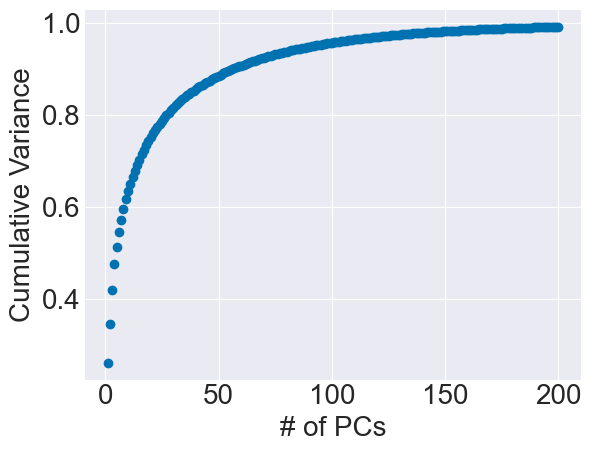

In [19]:
image = plt.imread("data/IMG_0006.JPG")
image_reshaped = image.reshape(816,612*3)
data_frame = pd.DataFrame(image_reshaped)
pcaAnalysis = pca.PCA(data_frame)
pcaAnalysis.fit(data_frame.columns,True)
pcaAnalysis.elbow_plot(200)
meanImage = np.mean(image,axis=0)

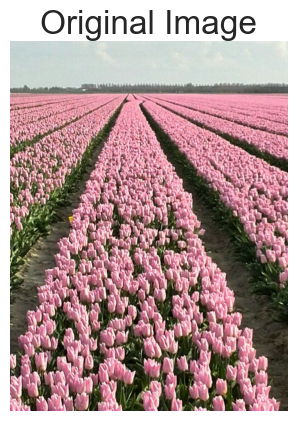

In [20]:
plt.imshow(image)
plt.title("Original Image")
plt.xticks([])
plt.yticks([]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11024104196767937..1.0316298603449183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06367569330790562..1.0590331867218306].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17180056322176873..1.125316567214007].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.28623781883872756..1.2876515282364447].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20447220057390514..1.228089241563489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07878174674966032..1.1121460038245399].


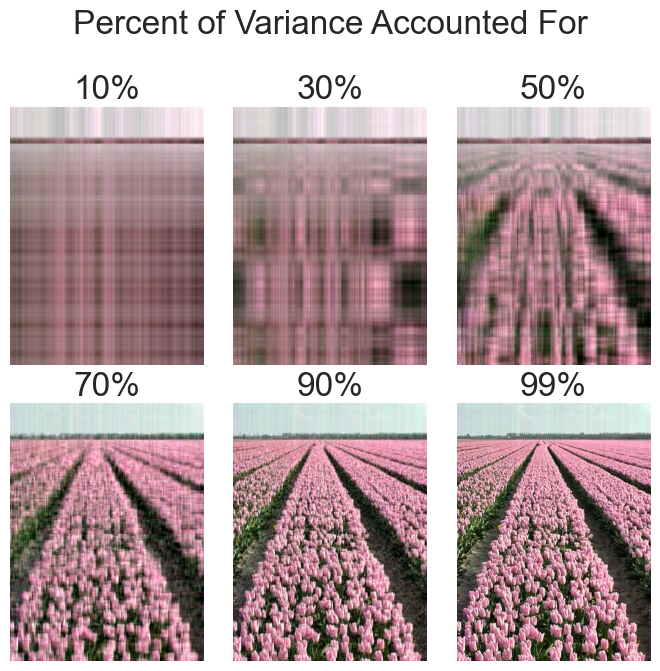

In [33]:
plt.subplots(2,3,figsize=(7,7))
plt.suptitle("Percent of Variance Accounted For")

plt.subplot(2,3,1)
plt.imshow(image)
plt.title("10%")
project_matrix = pcaAnalysis.pca_then_project_back(1)
matrix3D = np.real(project_matrix).reshape(816,612,3)
plt.imshow(matrix3D)
plt.xticks([])
plt.yticks([]);

plt.subplot(2,3,2)
plt.imshow(image)
plt.title("30%")
project_matrix = pcaAnalysis.pca_then_project_back(2)
matrix3D = np.real(project_matrix).reshape(816,612,3)
plt.imshow(matrix3D);
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(image)
plt.title("50%")
project_matrix = pcaAnalysis.pca_then_project_back(5)
matrix3D = np.real(project_matrix).reshape(816,612,3)
plt.imshow(matrix3D);
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,4)
plt.imshow(image)
project_matrix = pcaAnalysis.pca_then_project_back(20)
plt.title("70%")
matrix3D = np.real(project_matrix).reshape(816,612,3)
plt.imshow(matrix3D);
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,5)
plt.imshow(image)
project_matrix = pcaAnalysis.pca_then_project_back(60)
plt.title("90%")
matrix3D = np.real(project_matrix).reshape(816,612,3)
plt.imshow(matrix3D);
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,6)
plt.imshow(image)
project_matrix = pcaAnalysis.pca_then_project_back(200)
plt.title("99%")
matrix3D = np.real(project_matrix).reshape(816,612,3)
plt.imshow(matrix3D);
plt.xticks([])
plt.yticks([])

plt.tight_layout()

I used a single image from the web to identify and analyze the effect of adding more principle components to the image. I added more principle components at approximently a constant rate by increasing the cumulative variance by 20% each image. I found that in the first image, the overall color of the image relates to the original image by showing the main colors in the image. As more data is accounted for as the PCs increase, the images get clearer when the pixels get more specific to the original image.

### 3. Analyze eigen images

- For the letter data set, plot the first 6 eigenvectors as images. You will need to use a divergent colormap so that you can tell the difference between positive loadings, 0, and negative loadings. Further, `imshow` should be told to use a normalization that puts 0 in the middle of the colormap. To do that, you can find the largest magnitude loading in the first 6 vectors (refer to that as `mag`) and then add the following optional parameter to `imshow`: `norm=matplotlib.colors.Normalize(-mag,mag)`
- Once you have plotted the eigenvector images, use them to explain how the reconstruction of one sample from the data set is improved by using each additional eigenvector (first show the letter reconstructed with 1 vector, then 2, ..., until you get to the 6th). Describe in what way each of the eigenvectors causes the reconstruction to improve.

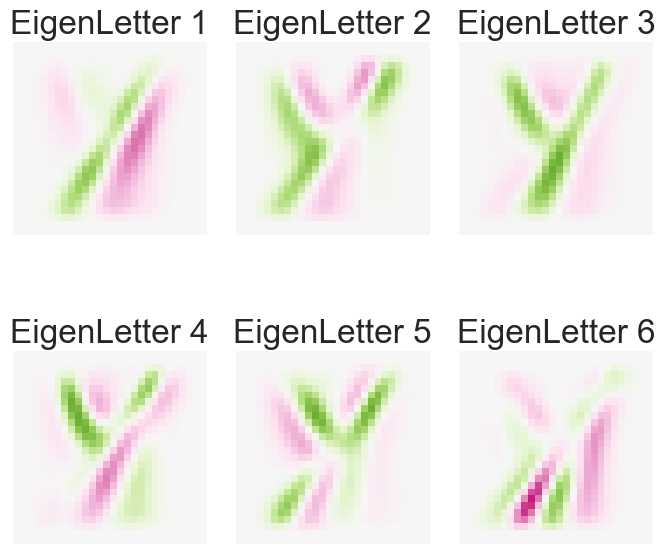

In [35]:
plt.subplots(2,3, figsize = (7,7))
mag = np.abs(np.max(np.real(analysis.e_vecs)))
norm = plt.Normalize(-mag/5,mag/5)
cmap = "PiYG"

plt.subplot(2,3,1)
evec1 = np.real(analysis.e_vecs[:,0])
evec1_reshaped = evec1.reshape(int(np.sqrt(evec1.shape[0])),int(np.sqrt(evec1.shape[0])))
plt.imshow(np.real(evec1_reshaped), cmap = cmap, norm = norm)
plt.title("EigenLetter 1")
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,2)
evec1 = np.real(analysis.e_vecs[:,1])
evec1_reshaped = evec1.reshape(int(np.sqrt(evec1.shape[0])),int(np.sqrt(evec1.shape[0])))
plt.imshow(np.real(evec1_reshaped), cmap = cmap, norm = norm)
plt.title("EigenLetter 2")
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
evec1 = np.real(analysis.e_vecs[:,2])
evec1_reshaped = np.real(evec1).reshape(int(np.sqrt(evec1.shape[0])),int(np.sqrt(evec1.shape[0])))
plt.imshow(np.real(evec1_reshaped), cmap = cmap, norm = norm)
plt.title("EigenLetter 3")
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,4)
evec1 = np.real(analysis.e_vecs[:,3])
evec1_reshaped = np.real(evec1).reshape(int(np.sqrt(evec1.shape[0])),int(np.sqrt(evec1.shape[0])))
plt.imshow(np.real(evec1_reshaped), cmap = cmap, norm = norm)
plt.title("EigenLetter 4")
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,5)
evec1 = np.real(analysis.e_vecs[:,4])
evec1_reshaped = np.real(evec1).reshape(int(np.sqrt(evec1.shape[0])),int(np.sqrt(evec1.shape[0])))
plt.imshow(np.real(evec1_reshaped), cmap = cmap, norm = norm)
plt.title("EigenLetter 5")
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,6)
evec1 = np.real(analysis.e_vecs[:,5])
evec1_reshaped = np.real(evec1).reshape(int(np.sqrt(evec1.shape[0])),int(np.sqrt(evec1.shape[0])))
plt.imshow(np.real(evec1_reshaped), cmap = cmap, norm = norm)
plt.title("EigenLetter 6")
plt.xticks([])
plt.yticks([]);

plt.tight_layout()

I found the first through sixth eigen vectors and reshaped them to (26,26) to plot them as images and then used a diverging heat map to differentiate positive and negative values. The effect of either adding or subtracting the first eigen letter image to the mean image stengthens the long line of the Y. Adding it will create a smaller potentially lowercase Y shape, and subracting it will create a wider potentially uppercase Y shape. The second eigen letter image strengthens the top part of the Y shape. The third image strengthens the overall Y shape when adding to the mean image, but has little effect on the reconstructed image when subtracting. The effect of the fourth eigen letter image makes the Y shape have more curves. Particularly it is when added to the mean image, the reconstructed image is a curve in the short line of the Y. If subracted instead, the long line of the Y would have a curve. The fifth eigen letter image enhances the hook of the Y shape when added to the mean image. However, when it is subtracted to the mean image, it enhances the curve in the short line of the Y shape. The sixth eigen letter image strengthens the bottom line of the Y shape wheter it is added or subtracted. The effects of adding the first through sixth eigen letter images to the mean image to get the reconstructed image is seen below.

In [23]:
project_matrix2 = analysis.pca_then_project_back(1)
matrix3 = np.real(project_matrix2)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed from 1 eigen vector")

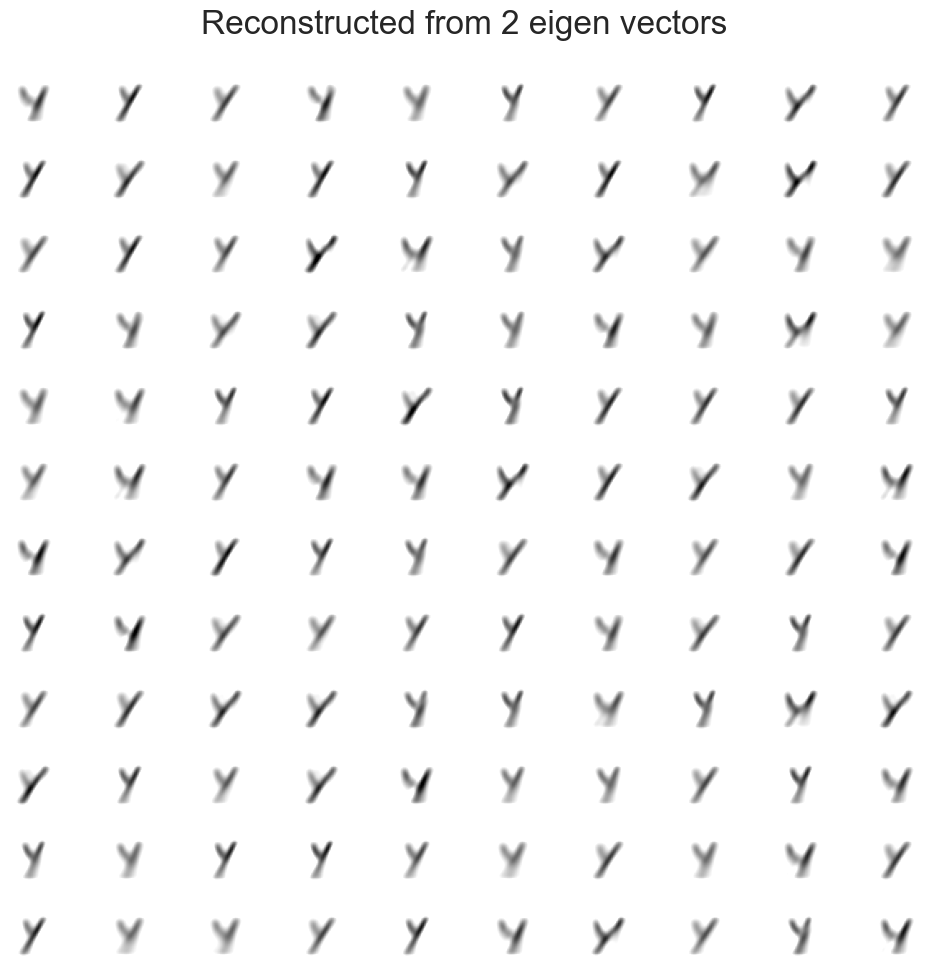

In [24]:
project_matrix2 = analysis.pca_then_project_back(2)
matrix3 = np.real(project_matrix2)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed from 2 eigen vectors")

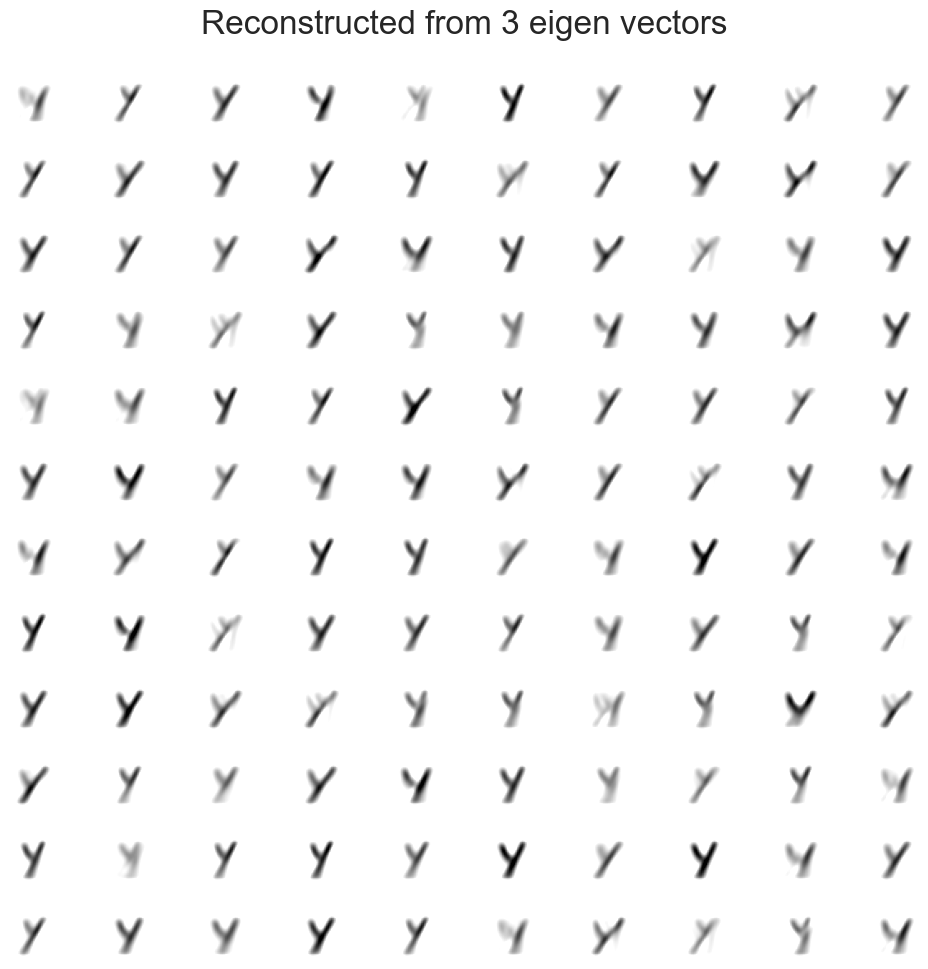

In [25]:
project_matrix2 = analysis.pca_then_project_back(3)
matrix3 = np.real(project_matrix2)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed from 3 eigen vectors")

In [26]:
project_matrix2 = analysis.pca_then_project_back(4)
matrix3 = np.real(project_matrix2)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed from 4 eigen vectors")

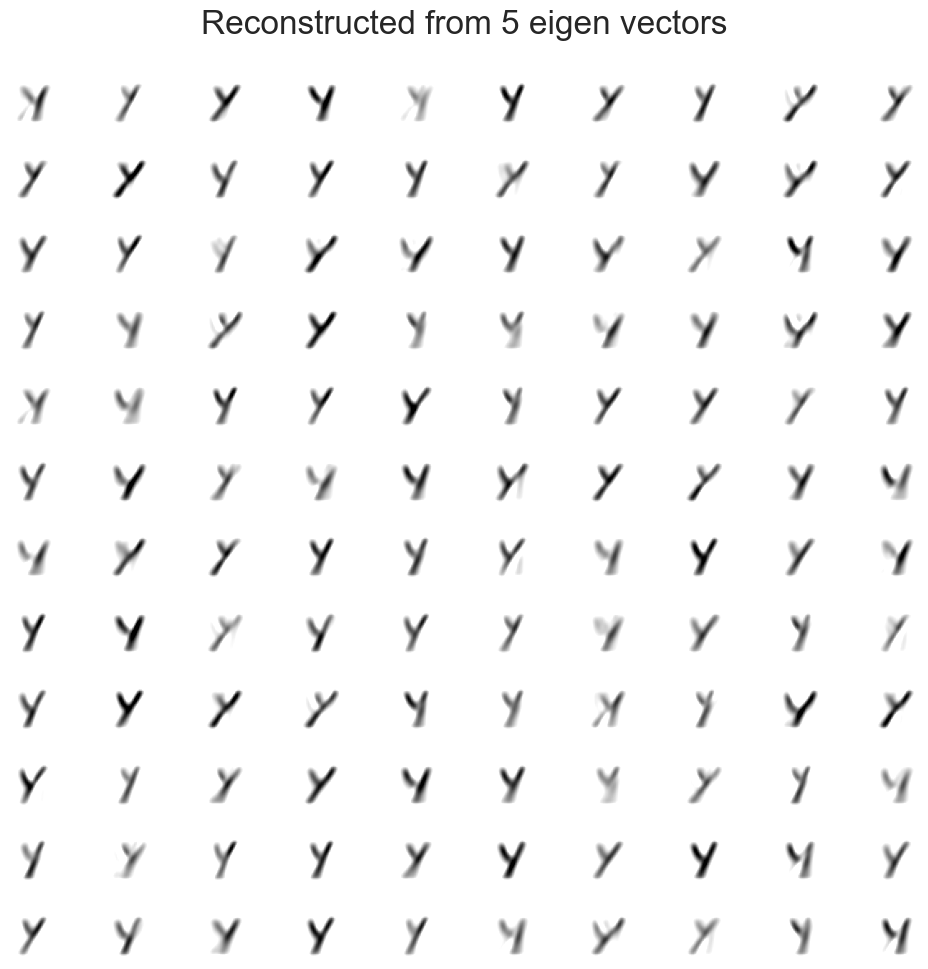

In [27]:
project_matrix2 = analysis.pca_then_project_back(5)
matrix3 = np.real(project_matrix2)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed from 5 eigen vectors")

In [28]:
project_matrix2 = analysis.pca_then_project_back(6)
matrix3 = np.real(project_matrix2)
img3D = make_imgs(matrix3)
plot3 = plot_letter(img3D, "Reconstructed from 6 eigen vectors")